<a href="https://colab.research.google.com/github/eliponc-code/sim-mat-2025/blob/main/ProyectoModulo3_PonceE_OrtizF_DiazJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Búsqueda de constante de enfriamiento

##**Objetivos**

### Objetivo general:

> - Determinar la temperatura ambiente que minimiza el costo total para bajar la mezcla de agua de $60°C$ a $25°C$

### Objetivos específicos:
> - Plantear la ecuación que describe el enfriamiento del agua usando la ley de enfiramiento de Newton.
> - Construir la función de costo total sumando el costo por enfriar el ambiente a una temperatura $T_A$ y el costo por el tiempo que tarda el agua en enfriarse hasta $25°C$.
> - Incorporar la incertidumbre en la constante de enfiramiento $k$, tratándola como un valor aleatorio entre $0.09$ y $0.11$.
> - Encontrar la tempetatura ambiente $T_A$ que minimiza el costo total, evaluando qué costo es menor.
> - Interpretar el resultado, explicando por qué esta temperatura es la que conviene.



## **Modelo que representa el problema**

> - ### Función de energía (costo) a optimizar

El costo total del proceso se define como:

$$
C_{\text{total}}(T_A,k)
= C_{\text{enfriado}}(T_A)
+ C_{\text{demora}}(t(T_A,k)).
$$

Con:

$$
C_{\text{enfriado}}(T_A)=12(T_A-25)^2,
$$

$$
C_{\text{demora}}(t)=(0.5t)^3.
$$

El objetivo es minimizar $C_{total}$ respecto a la temperatura ambiente \( T_A \).


> - ### Deducción del modelo

El proceso sigue la ecuación de enfriamiento de Newton:

$$
\frac{dT}{dt}=-k(T-T_A).
$$

La solución general es:

$$
T(t)=T_A + (T_0 - T_A)e^{-kt}.
$$

Con la condición inicial:

$$
T_0 = 60^\circ C.
$$

Para encontrar el tiempo necesario para llegar a \($25°C$):

$$
25 = T_A + (60 - T_A)e^{-kt}.
$$

Despejando el tiempo:

$$
t(T_A,k)=\frac{1}{k}\ln\left(\frac{60-T_A}{25-T_A}\right).
$$

Sustituyendo en el costo por demora:

$$
C_{\text{demora}}(t(T_A,k))
=
\left(
0.5\,
\frac{1}{k}
\ln\left(\frac{60-T_A}{25-T_A}\right)
\right)^3.
$$

Así, la función de costo total queda:

$$
C_{\text{total}}(T_A,k)
=
12(T_A-25)^2
+
\left(
0.5\,
\frac{1}{k}
\ln\left(\frac{60-T_A}{25-T_A}\right)
\right)^3.
$$


> - ### Situación representa el modelo

- Representa el proceso de enfriamiento del agua desde 60°C hasta 25°C.
- Permite evaluar el costo energético de enfriar el ambiente y el costo económico por tardanza.
- Considera la incertidumbre de la constante de enfriamiento:

$$
k \sim U(0.09,\,0.11).
$$

El modelo busca determinar la temperatura \(T_A\) más conveniente.


> - ### Limitaciones fundamentales

- La ley de Newton asume que el agua tiene temperatura uniforme.
- No se modelan efectos reales como evaporación, viento o humedad.
- El costo energético es un modelo aproximado.
- La distribución uniforme de \(k\) podría no ser la más realista.


> - ### Parámetros del modelo

$$
\begin{aligned}
T_0 &= 60^\circ C && \text{(temperatura inicial)} \\
T_A &\in [-15,\,25]^\circ C && \text{(temperatura del ambiente)} \\
k &\sim U(0.09,\,0.11)\,s^{-1} && \text{(constante de enfriamiento)} \\
C_{\text{enfriado}}(T_A) &= 12(T_A-25)^2 && \text{(costo de enfriamiento)} \\
C_{\text{demora}}(t) &= (0.5t)^3 && \text{(costo por tiempo de enfriado)} \\
\end{aligned}
$$

## Modelo que representa el problema

### Descripción del problema

Se desea enfriar agua con diferentes concentraciones de minerales cuya constante de enfriamiento $(k)$ varía de $0.09s^{-1}$ a $0.11s^{-1}$. La temperatura del entorno $(T_A)$ puede enfriarse de 25°C a -15°C, mas el costo por hacerlo se aproxima a $C_{enfriado}(T_A)=12(T_A-25)^2$. Además, el tiempo por enfriar la mezcla de agua es vital, por lo que demorarse en hacerlo ocaciona pérdidas que se aproximan como $C_{demora}(t)=(0.5t)^3$.

Encuentre la temperatura ambiente que genera el costo mínimo (la suma de $C_{enfriado}+C_{demora}$) de enfriar la mezcla a 25°C usando el modelo de enfriamiento de Newton:
$$
\frac{dT}{dt}=-k(T-T_A),
$$
siendo la temperatura inicial de 60°C.

Considere que, al no saber con precisión la constante de enfriamiento, ésta se tomará como un valor aleatorio uniformemente distribuido en la simulación del modelo.

¿Cuál es la temperatura ambiente que más conviene?

Resultados obtenidos:
Temperatura Ambiente Óptima: 7.4740 °C
Costo Mínimo Esperado: 322.2355


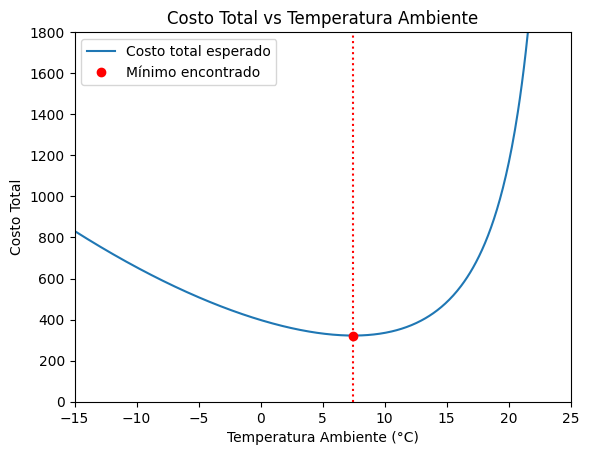

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Datos
T0 = 60
T_objetivo = 25
k_min = 0.09
k_max = 0.11

# Valor esperado E[1/k^3]
E_k_inverso_cubo = 1020.305333


def tiempo_enfriamiento(T_A, k):
    # t según ley de enfriamiento de Newton
    if T_A >= T_objetivo:
        return np.inf

    cociente = (T_objetivo - T_A) / (T0 - T_A)
    return (-1 / k) * np.log(cociente)


def costo_total_esperado(T_A):
    # Costo de enfriado
    C_enfriado = 0.5 * (T_A - T_objetivo)**2

    if T_A >= T_objetivo:
        return np.inf

    try:
        # log_factor = ln((25 - T_A) / (60 - T_A))
        log_factor = np.log((T_objetivo - T_A) / (T0 - T_A))
        # E[C_demora] = -0.125 * E[1/k^3] * [log_factor]^3
        E_C_demora = -0.125 * E_k_inverso_cubo * (log_factor**3)
    except:
        return np.inf

    return C_enfriado + E_C_demora


limites_TA = (-15.0, 25.0)
T_A_inicial = 5.0

resultado = minimize(
    fun=costo_total_esperado,
    x0=T_A_inicial,
    bounds=[limites_TA],
    method='L-BFGS-B'
)

# Rresultados
if resultado.success:
    T_A_optima = resultado.x[0]
    Costo_minimo = resultado.fun

    print("Resultados obtenidos:")
    print(f"Temperatura Ambiente Óptima: {T_A_optima:.4f} °C")
    print(f"Costo Mínimo Esperado: {Costo_minimo:.4f}")
else:
    print("Optimización fallida:", resultado.message)


def graficar_costo(T_A_optima, Costo_minimo):
    T_A_valores = np.linspace(-15, 25, 500)
    costo_valores = []

    for T in T_A_valores:
        costo_valores.append(costo_total_esperado(T))

    plt.plot(T_A_valores, costo_valores, label='Costo total esperado')
    plt.plot(T_A_optima, Costo_minimo, 'ro', label='Mínimo encontrado')

    plt.xlabel('Temperatura Ambiente (°C)')
    plt.ylabel('Costo Total')
    plt.title('Costo Total vs Temperatura Ambiente')
    plt.axvline(T_A_optima, color='r', linestyle=':')
    plt.legend()
    plt.xlim([-15, 25])
    plt.ylim([0, 1800])

    plt.show()


graficar_costo(T_A_optima, Costo_minimo)

### **Conclusión**
El análisis de optimización revela que la temperatura ambiente óptima para minimizar el costo total esperado es $\mathbf{T_A^* \approx 7.47^\circ \text{C}}$, resultando en un costo esperado mínimo de $\mathbf{322.24}$ unidades monetarias. Este resultado se obtiene al minimizar la suma del costo de enfriado del ambiente (que aumenta al bajar $T_A$) y el costo esperado de demora (que aumenta al subir $T_A$)

El gráfico en forma de 'U' muestra el punto de equilibrio donde el costo de enfriado y el costo de demora se compensan perfectamente. Además de reducir la temperatura a $7.47^\circ \text{C}$, se logra una reducción en el tiempo de enfriamiento ($t$), minimizando así las costosas pérdidas por demora y alcanzando el punto de costo total más bajo.

La temperatura óptima de $7.47^\circ \text{C}$ representa el equilibrio ideal, ya que evita la región de altas temperaturas cercanas a $25^\circ \text{C}$ donde el tiempo de enfriamiento y el costo cúbico por demora se disparan; al mismo tiempo, no se cae en un gasto excesivo requerido para lograr temperaturas de enfriamiento mucho más bajas (cercanas a $-15^\circ \text{C}$), donde la reducción en el tiempo ya no compensa el alto costo de energía para enfriar el ambiente.

## **Referencias**
- Cánovas Peña, J. S., & Paredes Hernández, S. (s. f.). Prácticas de optimización. Departamento de Matemática Aplicada y Estadística, Universidad Politécnica de Cartagena. https://www.dmae.upct.es/~paredes/am_ti/practicas/optprac.pdf
- Espínola, J., Cobo, A., & Rocha, R. (2022). Metaheurísticas con Python: casos prácticos. Revista de Investigación Hatun Yachay Wasi, 1(2), 43-57. https://revistas.utea.edu.pe/index.php/hyw/article/download/23/19/45
- NumPy developers. (s. f.). numpy.vectorize — NumPy v2.3 manual. NumPy. https://numpy.org/doc/stable/reference/generated/numpy.vectorize
